# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando pa√≠ses modelo de distintas pol√≠ticas p√∫blicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por pa√≠s [aqu√≠.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podr√°s cargarlos en el notebook usando pandas, a partir de eso selecciona los de los pa√≠ses que te interesan, hay un ejemplo de c√≥mo se hace esto en este notebook. 

# ¬øC√≥mo empez√≥ la pandemia?


  La primer parte del trabajo consiste en estudiar c√≥mo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en funci√≥n del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un par√°metro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, m√°s grande ser√° el n√∫mero de casos confirmados dado por la expresi√≥n. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cu√°ntas personas que se pueden contagiar ve una persona enferma por d√≠a. Es decir, la circulaci√≥n. Haciendo cuarententa, $k$ disminuye, con la circulaci√≥n $k$ aumenta.

  El par√°metro $k$ est√° directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezand√≥ por [aqu√≠](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca informaci√≥n sobre "modelo epidemiol√≥gico SEIR". Si quieres ver c√≥mo funciona este modelo, puedes empezar por [aqu√≠](http://gabgoh.github.io/COVID/index.html). En ese link est√° implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los par√°metros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver c√≥mo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresi√≥n para describir √∫nicamente la etapa de crecimiento exponencial.


  Comienza estudiando c√≥mo se distribuy√≥ el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez pa√≠ses del norte (ah√≠ empez√≥ la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evoluci√≥n mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y as√≠ generar un modelo nuevo, basado en la distribuci√≥n de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qu√© significa que el modelo de "bien" o d√© "mal" ¬øqu√© indicadores de esto existen?. Luego discute en el informe por qu√© crees que dio as√≠. Recuerda que es importante elegir bien la poblaci√≥n de muestra. Piensa qu√© criterios puedes elegir para representar bien la poblaci√≥n mundial que se contagi√≥ al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener informaci√≥n de las curvas, puedes intentar evaluar las estrategias de acci√≥n y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categor√≠a binaria que hable de pol√≠ticas p√∫blicas elegidas por los pa√≠ses para enfrentar la pandemia que te interese estudiar, como pueden ser "la poblaci√≥n hizo cuarententa" o "la poblaci√≥n se vacun√≥".
2. Piensa qu√© indicadores de la curva pueden hablar del √©xito de la pol√≠tica que quieres estudiar. Por ejemplo, si se tratase de evaluar el √©xito de una cuarentena podr√≠a ser porcentaje de poblaci√≥n  que se contagi√≥ o variaci√≥n del valor de $k$ a partir de que se empez√≥ a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre pa√≠ses que hayan aplicado o no esa pol√≠tica p√∫blica, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selecci√≥n inteligente de la porci√≥n de datos de la curva de cada pa√≠s que vas a analizar.
4. Construye un clasificador binario a partir de una regresi√≥n log√≠stica o usando Naive Bayes para intentar analizar la estrategia de otros pa√≠ses y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en funci√≥n da las categor√≠as "la poblaci√≥n hizo cuarentena" y "la poblaci√≥n n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del an√°lisis estad√≠stico propuesto.

#¬°Comencemos!

  A continuaci√≥n dejamos un ejemplo de c√≥mo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados m√≠nimos. Si necesitas los datos mundiales, en la columna de pa√≠ses aparecen como "World".



In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy import stats
#from google.colab import drive
from scipy.optimize import curve_fit
#conda install -c plotly plotly
#import plotly.express as px
import seaborn as sns
# Configuraci√≥n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import itertools
# Varios
# ==============================================================================
from tqdm import tqdm
#from tqdm import tqdm_notebook as tqdm
from sklearn import metrics

Cargamos el data set y realizamos un analisis exploratorio eligiendo a Argentina como Pa√≠s.

In [66]:
#datos=pd.read_csv('/content/gdrive/My Drive/datos_acamica/datos_covid.csv')
datos=pd.read_csv('data/owid-covid-data.csv')
datos_orig = datos.copy()

In [3]:
datos2 = datos[['location','iso_code','date','total_tests','total_deaths','total_cases']]

In [4]:
#datos.info()

In [5]:
paises=datos2['location'] #cargo el vector de paises
confirmados=datos2['total_cases'] #carga vector todos los casos confirmados

Text(0, 0.5, 'cantidad de casos')

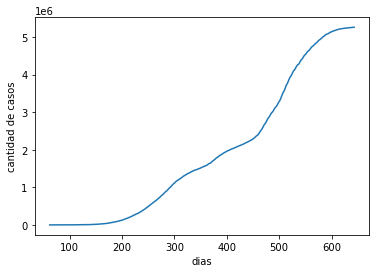

In [6]:
#seleccionamos Argentina
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Observamos que en Argentina el primer caso de Covid no fue inmediatamente posterior al primer caso detectado en el mundo. Para determinar el d√≠a en que se detect√≥ el primer caso en Arg primero vamos a filtrar por Pais, all√≠ obtenemos los indices.

In [7]:
#paises[paises == 'Argentina']
#ind_arg[0]
ind_arg[:10]
# o podemos hacer esto
#np.where(paises=='Argentina')

array([4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338])

In [8]:
#confirmados[ind_arg]

In [9]:
#Transformamos el array a lista
lst = list(casos_arg)

In [10]:
# Buscamos el primer valor no nulo, ser√≠a el primer d√≠a con casos
#casos_arg[np.isfinite(casos_arg)][0]
lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]

1.0

In [11]:
# Buscamos el indice del primer elemento no nulo
lst.index(next(filter(lambda x: not np.isnan(x), lst)))

62

In [12]:
## entonces el primer caso corresponde al indice 4391
casos_arg[62:][:5]

4391    1.0
4392    1.0
4393    1.0
4394    2.0
4395    8.0
Name: total_cases, dtype: float64

Una vez obtenido el primer elemento no nulo, es decir cuando ocurre el primer caso, podemos saber cual es la fecha a partir de indice obtenido.

In [13]:
# primer caso de covid en Argentina
datos2.loc[4391]

location         Argentina
iso_code               ARG
date            2020-03-03
total_tests          654.0
total_deaths           NaN
total_cases            1.0
Name: 4391, dtype: object

Esta es la curva de **casos totales** de la Argentina. Aqu√≠ no se ven las olas, ya que estas se ven en la curva de casos confirmados por d√≠a, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logar√≠tmica


Text(0, 0.5, 'log cantidad de casos')

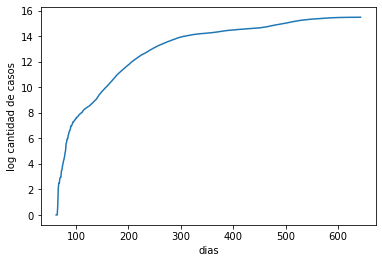

In [14]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 d√≠as desde que se detect√≥ el primer caso en Argentina, para ver c√≥mo fue el $k$ inicial

In [15]:
# comenzamos desde el indice 62 que es cuando se detect√≥ el primer caso en Argentina. id 4391
print(list(casos_arg[62:122][:10]))

[1.0, 1.0, 1.0, 2.0, 8.0, 12.0, 12.0, 17.0, 19.0, 19.0]


Text(0, 0.5, 'cantidad de casos')

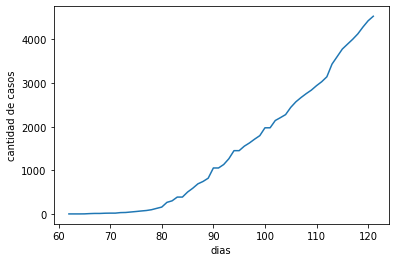

In [16]:
#Se filtra desde el primer d√≠a que hubo casos
casos_principio=casos_arg[62:122]
dias_principio=dias[62:122]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es dif√≠cil determinar si esta parte es exponencial. Analicemos qu√© pasa en escala logar√≠tmica.

Text(0, 0.5, 'log cantidad de casos')

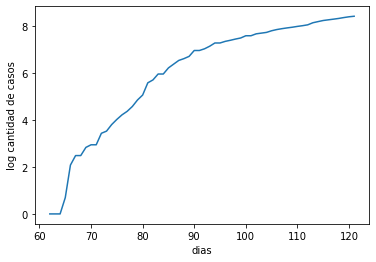

In [17]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Notar que los datos comienzan desde el d√≠a 62, que es el d√≠a en que se deect√≥ el primer caso de covid en Argentina desde comenzada la pandemia en el mundo. Mejor nos quedamos con lo que sucede entre los d√≠as 31 y 55, ya que ese fue el comportamiento m√°s sostenido.

Text(0, 0.5, 'cantidad de casos')

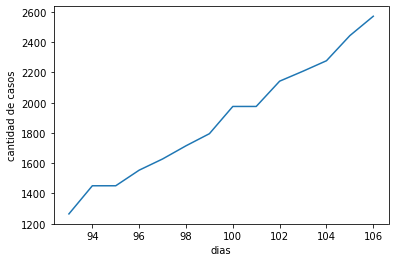

In [18]:
#casos_principio=casos_arg[31:55]
#dias_principio=dias[31:55]

casos_principio=casos_arg[93:107]
dias_principio=dias[93:107]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

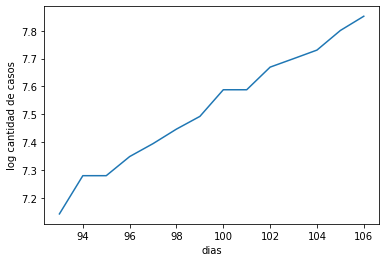

In [19]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¬°Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el m√©todo de cuadrados m√≠nimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [20]:
#definimos funci√≥n para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [21]:
#ajustamos, popt[0] es nuestro "K" y popt[1] t0
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([  0.05065185, -49.02984924])

**popt :** Valores optimos para los par√°metros, donde la suma del error cuadratico es minimizado. El primer elemento para nuestra funci√≥n definida es el valor `k` y el segundo es `t0`

**pcov :** La covarianza estimada de popt. La diagonal provee la varianza del parametro estimado. Para computar el error, la desviaci√≥n estandar de un par√°metro hay usar perr = np.sqrt(np.diag(pcov)).

In [22]:
popt

array([  0.05065185, -49.02984924])

In [23]:
pcov

array([[1.94919125e-06, 5.77705715e-03],
       [5.77705715e-03, 1.71333636e+01]])

In [24]:
perr = np.sqrt(np.diag(pcov))
#float(perr)p
perr

array([1.39613439e-03, 4.13924674e+00])

In [25]:
#print("El intervalo de confianza para K es: {} - {}".format( round(perr[0],3), round(perr[1],3) ))

Veamos c√≥mo se ajusta lo que obtuvimos a los datos reales

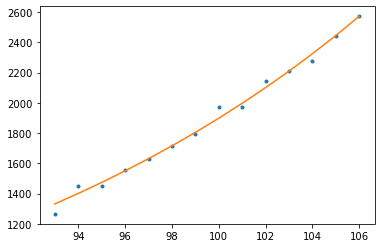

In [26]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

In [27]:
print(list(dias_principio))

[93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]


In [28]:
print(list(casos_principio))

[1265.0, 1451.0, 1451.0, 1554.0, 1628.0, 1715.0, 1795.0, 1975.0, 1975.0, 2142.0, 2208.0, 2277.0, 2443.0, 2571.0]


Como √∫ltima pista, hagamos una funci√≥n que determine los casos nuevos por d√≠a a partir de estas curvas. Puede ser √∫til para tu an√°lisis.

In [29]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

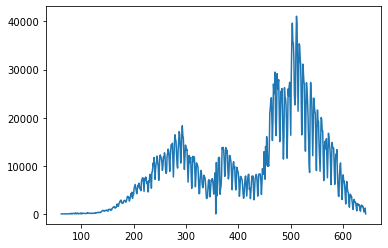

In [30]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

Analiza si es posible estimar la evoluci√≥n mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para  ùëò  a partir de los que obtuviste y as√≠ generar un modelo nuevo, basado en la distribuci√≥n de  ùëò . Luego compara el modelo con los datos mundiales.

#### 1) Elegir diez pa√≠ses del norte (ah√≠ empez√≥ la pandemia) y puedes mide el valor de  ùëò  inicial de la pandemia, analizando datos del primer tramo.

Datos: Locations paises- Creamos una funci√≥n que muestre cuando fue la aparici√≥n del primer caso y la evoluci√≥n

In [31]:
#datos[datos.location == list_paises]
#datos[datos["location"].isin([list_paises])]
print(list(paises.unique()[0:10]))

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia']


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:00<00:00, 53.42it/s]


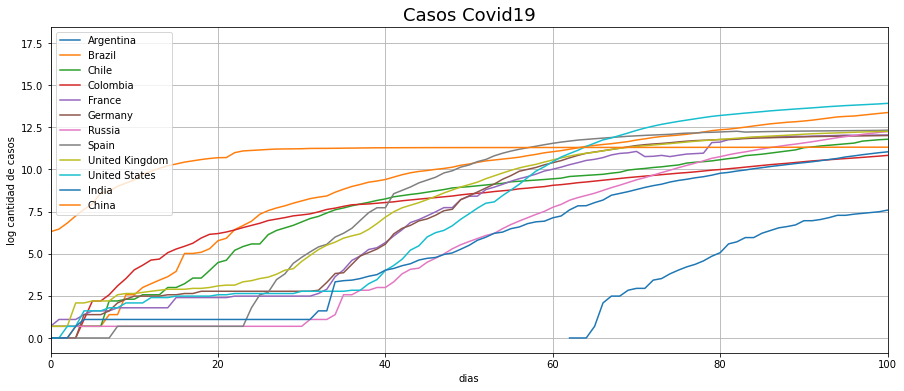

In [32]:
## Inicio de analisis

lista_paises = ['Argentina','Brazil','Chile','Colombia','France','Germany','Russia','Spain','United Kingdom','United States','India','China']
#lista_paises = ['Argentina','Brazil','Chile','Colombia']

#armamos la figura para el gr√°fico
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('Casos Covid19',fontsize=18, loc='center')
ax.set_xlim([0, 100])
ax.grid()

for x_pais in tqdm(lista_paises):
    #seleccionamos Argentina
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, ser√≠a el primer d√≠a con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Argentina
    dia_start = datos2.date.loc[ind_x]
    #print("En {} el/los primer/primeros {} casos fue el d√≠a {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    #ax.set_xticklabels(models, rotation=0)    
    fig = plt.plot(dias,np.log(casos_xpais),label=x_pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')
    #ax.set_xticklabels(models, rotation=0)
    ax.legend()

Se observa el crecimiento exponencial, en el caso de Argentina el primer caso fue 62 d√≠as posteriores al detectado el primer caso en el mundo. Para todos los paises se tomar√° 35 d√≠as despu√©s de detectado el primer caso, desde all√≠ se puede observar un crecimiento continuo.

2. Analiza si es posible estimar la evoluci√≥n mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para  ùëò  a partir de los que obtuviste y as√≠ generar un modelo nuevo, basado en la distribuci√≥n de  ùëò . Luego compara el modelo con los datos mundiales.

La siguiente funci√≥n calcular√° el `K` y `t0` para cada pais de una lista elegida (10 paises del emisferio norte donde comenz√≥ la pandemia)

In [33]:
#lista vacia para guardar los mejores valores de k obtenidos para cada modelo seg√∫n el pa√≠s.
lista_k = []
lista_t0 = []

#definimos funci√≥n para ajustar modelo
def exponencial(t,k,t0):
    C=np.exp(k*(t-t0))
    return C

#definimos funci√≥n para calcular k para cada pais 
def calcular_k(lista_paises):
    '''
    Funci√≥n para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
    
    #armamos la figura para el gr√°fico
    #fig, ax = plt.subplots(figsize=(15,6))
    fig, axes = plt.subplots(2, figsize=(15, 12))
    fig.suptitle('Casos Covid19', fontsize=20)
    fig.tight_layout(pad=4.0)

    axes[0].set_title('Casos Covid19 Logaritmico',fontsize=14, loc='center')
    axes[0].set_xlim([0, 85])
    axes[0].grid()

    axes[1].set_title('Casos Covid19 Simulados',fontsize=14, loc='center')
    axes[1].set_xlim([0, 85])
    #axes[1].set_ylim([0, 200000])
    axes[1].grid()

    #color lineas gr√°fico
    marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))


    for x_pais in lista_paises:
        #seleccionamos Pais
        ind_xpais=np.where(paises==x_pais)
        ind_xpais=ind_xpais[0]
    
        casos_xpais=confirmados[ind_xpais]
        dias=np.arange(0,len(casos_xpais))
        #Imputamos los nan con 0
        #casos_xpais.fillna(0, inplace=True)
    
    
        #Transformamos a lista
        lst = list(casos_xpais)
        # Buscamos el primer valor no nulo, ser√≠a el primer d√≠a con casos
        ##from numpy import nan
        #casos_arg[np.isfinite(casos_arg)][0]
        primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
        # Buscamos el indice del primer elemento no nulo
        ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
        # primer caso de covid en Argentina
        dia_start = datos2.date.loc[ind_x]
        print("En {} el/los primer/primeros {} casos fue el d√≠a {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
        ## Graficamos
        #fig, ax = plt.subplots(figsize=(8,3))
        dias=np.arange(0,len(casos_xpais))
        #ax.set_xticklabels(models, rotation=0)    
        axes[0].plot(dias,np.log(casos_xpais),label=x_pais)
        axes[0].set_xlabel('dias')
        axes[0].set_ylabel('log cantidad de casos')
        #ax.set_xticklabels(models, rotation=0)
        axes[0].legend()
    
        ################# Estimamos K
        
        dia_desfase = 0
        ind_inicio = ind_x + dia_desfase
        ind_final = ind_inicio + dia_desfase + 60
        
        #dias=np.arange(0,len(casos_arg))
    
        print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
        casos_principio=casos_xpais[ind_inicio:ind_final]
        dias_principio=dias[ind_inicio:ind_final]
        print(list(dias_principio))    
        print(list(casos_principio))

        #ajustamos, popt[0] es nuestro "K" y popt[1] t0
        popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
        #popt
    
        #Guardamos el valor de k y t0 en la lista:
        lista_k.append(popt[0])
        lista_t0.append(popt[1])

        # Ajustamos los datos con los valores de los par√°metros obtenidos
        k=popt[0]
        t0=popt[1]
        print("PARAMETRO K: ",k)    
        print("PARAMETRO t0: ",t0)
        print(dias_principio.size)
        print(casos_principio.size)
        casos_simu=exponencial(dias_principio,k,t0)
        ## Graficamos las simulaciones
    
        #color de la lineas
        color = next(ax._get_lines.prop_cycler)['color']

        axes[1].plot(dias_principio,casos_principio,'.', color=color)
        axes[1].plot(dias_principio,casos_simu,label=x_pais, color = color)
        axes[1].set_xlabel('dias')
        axes[1].set_ylabel('cantidad de casos')
        axes[1].legend()
        
    return lista_k  

Definimos la lista de paises para entrenar nuestro modelo y obtener los mejores par√°metros de `K` y `t0`

In [34]:
# lista de paises a evaluar, elegimos inicialmente 10 paices del emisferio Norte
#lista_paises = ['Denmark','Italy','Israel','Portugal','France','Germany','Russia','Spain','United Kingdom','United States','India','China']
lista_paises = ['Denmark','Italy','Israel','Portugal','France','Germany','Russia','Spain','United Kingdom','Belgium','India','Sweden']

#lista_paises = ['Argentina','Brazil','Chile','Colombia']
#lista_paises = ['France','Germany','Italy']

Ejecutamos la funci√≥n pasandole como argumento la lista de paises anteriormente definida:

En Denmark el/los primer/primeros 1.0 casos fue el d√≠a 2020-03-20 indice 25
Denmark ind_inicio 25  ind_final 85
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[1.0, 1.0, 3.0, 4.0, 4.0, 6.0, 11.0, 11.0, 24.0, 24.0, 37.0, 92.0, 264.0, 444.0, 617.0, 804.0, 836.0, 875.0, 933.0, 1025.0, 1116.0, 1225.0, 1337.0, 1420.0, 1514.0, 1572.0, 1718.0, 1862.0, 2023.0, 2200.0, 2366.0, 2564.0, 2755.0, 3039.0, 3290.0, 3573.0, 3946.0, 4269.0, 4561.0, 4875.0, 5266.0, 5597.0, 5830.0, 6014.0, 6191.0, 6369.0, 6513.0, 6706.0, 6876.0, 7074.0, 7268.0, 7437.0, 7580.0, 7711.0, 7891.0, 8108.0, 8271.0, 8408.0, 8643.0, 8773.0]
PARAMETRO K:  0.04753202831056988
PARAMETRO t0:  -110.40708183152111
60
60
En Italy el/los primer/primeros 2.0 casos fue el d√≠a 2020-02-24 indice 0
Italy ind_inicio 0  ind_final 60
[0, 1, 2, 3, 4, 5, 6

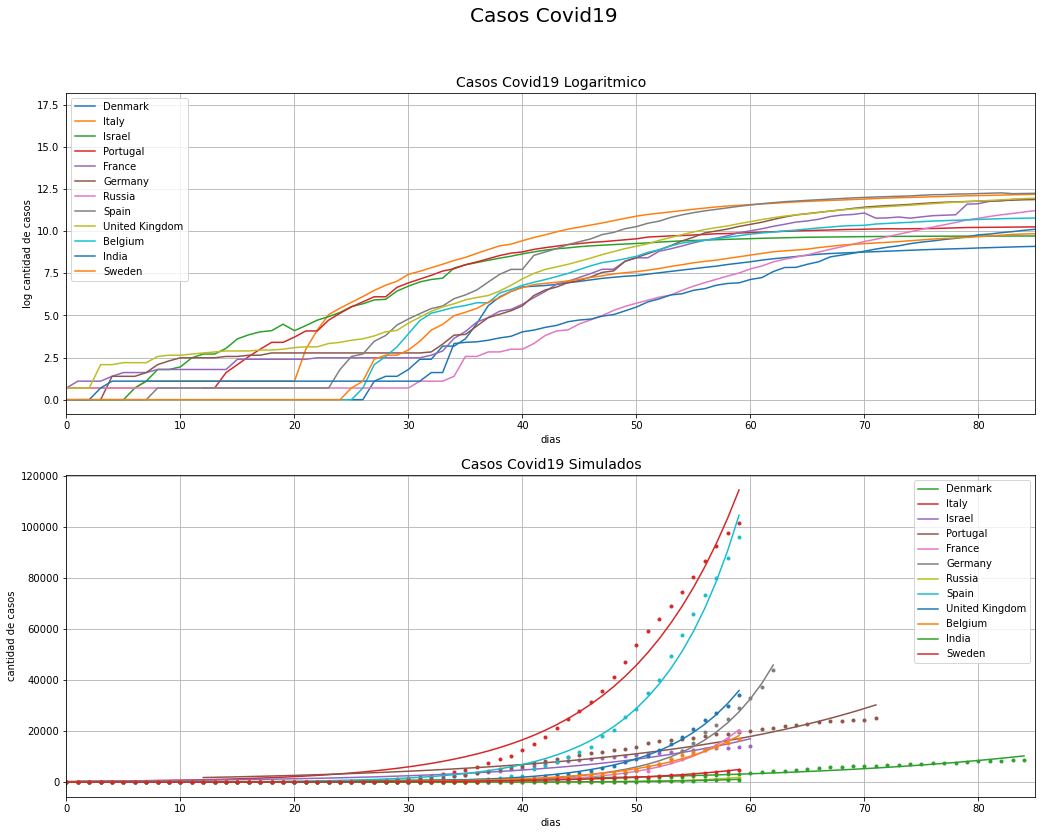

In [35]:
lista_k = calcular_k(lista_paises)

Graficamos la distribuci√≥n de K para los m√≥delos obenidos anteriormente para cada pais.

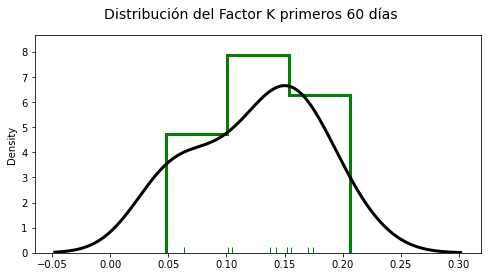

In [36]:
fig, axes = plt.subplots(1, figsize=(8,4))
fig.suptitle('Distribuci√≥n del Factor K primeros 60 d√≠as', fontsize=14)
ax = sns.distplot(lista_k, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

#### Intervalo de confianza basado en percentiles
Mediante bootstrapping, se simula la variabilidad esperada en el estad√≠stico, en este caso la media, debido √∫nicamente al muestreo aleatorio.

In [37]:
def calcular_estadistico(x):
    '''
    Funci√≥n para calcular el estad√≠stico de inter√©s.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estad√≠stico: float
        valor del estad√≠stico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Funci√≥n para calcular el valor del estad√≠stico en m√∫ltiples muestras generadas
    mediante muestreo repetido con reposici√≥n (bootstrapping).
    
    Parameters
    ----------
    x : numpy array 
        valores de la muestra.
 
    fun_estadistico : funcion
        funci√≥n que recibe como argumento una muestra y devuelve el valor
        del estad√≠stico.
        
    n_iteraciones : int
        n√∫mero iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estad√≠stico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    #Return a new array of given shape and type, filled with fill_value. Array con con shape 9999 y todos los valores en nan
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

Calcular el estad√≠stico, en este caso la media

In [38]:
# Convertir lista a array
datos = np.array(lista_k)

In [39]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9999/9999 [00:00<00:00, 17736.13it/s]


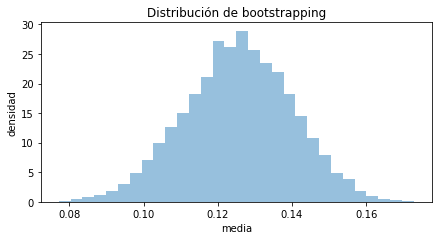

In [40]:
# Distribuci√≥n de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribuci√≥n de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

La dispersi√≥n de la distribuci√≥n obtenida por bootstrapping es una aproximaci√≥n del error est√°ndar esperado debido a proceso de muestreo. Por esta raz√≥n, pueden emplearse sus percentiles para calcular intervalos de confianza. 

Ahora generemos el intervalo de confianza.  Primero hay que elegir $\alpha$, el error que estamos dispuestas/os a cometer. En este caso tomaremos $\alpha=0.05$, que implica que toleraremos hasta un 5% de error.

Una vez establecido alpha, podemos armar el intervalo de confianza para saber con un 95% un intervalo donde se encuentra el promedio $\mu$ de toda la poblaci√≥n, usando una submuestra de esta. 

In [41]:
# Intervalo IC basado en percentiles de la distribuci√≥n bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo de confianza de K basado en percentiles es:')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo de confianza de K basado en percentiles es:
-------------------------------
[0.09666279 0.15350362]


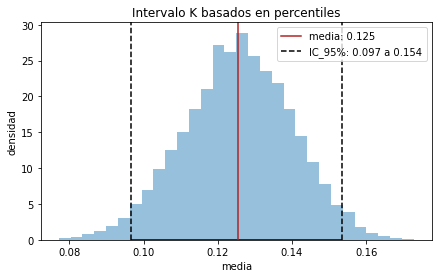

In [42]:
# Gr√°fico intervalo de confianza del 95% para K, aceptando un error de 5%
# ==============================================================================
media_obs = datos.mean()
media_obs = "{:.3f}".format(datos.mean())
media_obs = "media: " + media_obs

int_obs_izq = list(cuantiles)
int_obs_izq = "{:.3f}".format(cuantiles[0])
int_obs_der = "{:.3f}".format(cuantiles[1])

IC_95 = "IC_95%: " + int_obs_izq +" a "+ int_obs_der

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
#ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=datos.mean(), color='firebrick', label=media_obs)

#ax.axvline(x=cuantiles[0], color='black', linestyle='--', label=IC 95%)
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label=IC_95)
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo K basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();

Redifinimos la funci√≥n exponencial con los par√°metros obtenidos de `K` y `t0`, luego probamos con datos reales de otros pa√≠ses

In [134]:
k=np.median(lista_k)
t0=np.median(lista_t0)
print(k)
print(t0)

0.14016756412429926
-17.14358317095558


In [135]:
#definimos funci√≥n para ajustar modelo
def exponencial_new(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [136]:
# Definimos la funci√≥n para predecir la curva de contagios para x pais seg√∫n el valor de k obtenido.

#def predecir(lista_paises,k,t0):
def predecir(x_pais,k,t0):
    '''
    Funci√≥n para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
    
    #armamos la figura para el gr√°fico
    #fig, ax = plt.subplots(figsize=(15,6))
    fig, axes = plt.subplots(1, figsize=(12, 6))
    fig.suptitle('Casos Covid19', fontsize=20)
    fig.tight_layout(pad=4.0)

    #axes[0].set_title('Casos Covid19 Logaritmico',fontsize=14, loc='center')
    #axes[0].set_xlim([0, 80])
    #axes[0].grid()

    axes.set_title('Casos Covid19 Simulados {}'.format(x_pais),fontsize=14, loc='center')
    axes.set_xlim([0, 80])
    axes.grid()

    #color lineas gr√°fico
    marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))


#    for x_pais in lista_paises:
    #seleccionamos Pais
    print("Pais seleccionado: {}".format(x_pais))
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    dias=np.arange(0,len(casos_xpais))
    #Imputamos los nan con 0
    #casos_xpais.fillna(0, inplace=True)
    
    
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, ser√≠a el primer d√≠a con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Pais_X
    dia_start = datos2.date.loc[ind_x]
    print("En {} el/los primer/primeros {} casos fue el d√≠a {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    ############### indices inicio y final
    ind_inicio = ind_x
    #ind_inicio = 0
    ind_final = ind_inicio + 60
    #ind_final = ind_inicio 
        
    #ax.set_xticklabels(models, rotation=0)    
    #axes[0].plot(dias,np.log(casos_xpais),label=x_pais)
        #axes[0].set_xlabel('dias')
        #axes[0].set_ylabel('log cantidad de casos reales')
        ##ax.set_xticklabels(models, rotation=0)
        #axes[0].legend()
        #axes[0].set_xlim(ind_inicio,ind_final)
        
        ################# Estimamos K

    dias_x=np.arange(ind_x,ind_final)
    #dias_x=np.arange(0,60)

    print("----dias_x para simulacion-----")
    print(list(dias_x))
    #print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
    casos_principio=casos_xpais[ind_inicio:ind_final]
    dias_principio=dias[ind_inicio:ind_final]
    print("----dias_principio casos reales------")
    print(list(dias_principio)) 
    print("------casos_principio reales-----")
    print(list(casos_principio.astype(int)))

    #ajustamos, popt[0] es nuestro "K" y popt[1] t0
    #popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
    #popt
    
    #Guardamos el valor de k en la lista:
    #lista_k.append(popt[0])

    # Ajustamos los datos con los valores de los par√°metros obtenidos
    #k=popt[0]
    #t0=popt[1]
    print("PARAMETRO K: ",k)    
    print("PARAMETRO t0: ",t0)
    #print(dias_principio.size)
    #print(casos_principio.size)
    #print(dias_x.size)
    casos_simu=exponencial_new(dias_x,k,t0)
    #print(casos_simu.size)
    print("-----casos_simu------")
    print(list(casos_simu.astype(np.int)))
   
    ## Graficamos las simulaciones
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"

    #color de la lineas
    color = next(ax._get_lines.prop_cycler)['color']
    axes.plot(dias_principio,casos_principio,label=label_real, color=color)
    axes.plot(dias_x,casos_simu,'.',label=label_simu, color = color)
    #axes.set_xlabel('das')
    #axes.set_ylabel('cantidad de casos')
    axes.legend()
    plt.xlim([ind_inicio,ind_final])
        
    return list(casos_principio)
      

In [137]:
#np.exp(0.147*(62-60))

In [138]:
#lista_paises = 'Argentina'
##lista_paises = 'Brazil'
#casos_principio = predecir(lista_paises,k,t0)
##casos_principio

Predecimos la curva de contagios y comparamos la curva de contagios real de una lista de paises de latinoamerica elegidos

Pais seleccionado: Argentina
En Argentina el/los primer/primeros 1.0 casos fue el d√≠a 2020-04-26 indice 62
----dias_x para simulacion-----
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
----dias_principio casos reales------
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
------casos_principio reales-----
[1, 1, 1, 2, 8, 12, 12, 17, 19, 19, 31, 34, 45, 56, 68, 79, 97, 128, 158, 266, 301, 387, 387, 502, 589, 690, 745, 820, 1054, 1054, 1133, 1265, 1451, 1451, 1554, 1628, 1715, 1795, 1975, 1975, 2142, 2208, 2277, 2443, 2571, 2669, 2758, 2839, 2941, 3031, 3144, 3435,

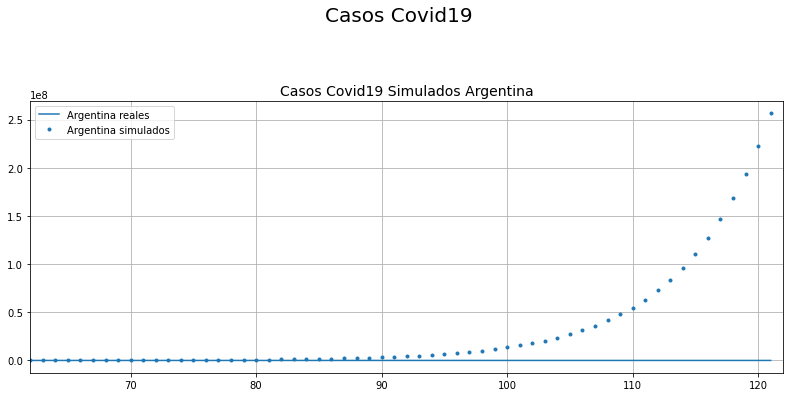

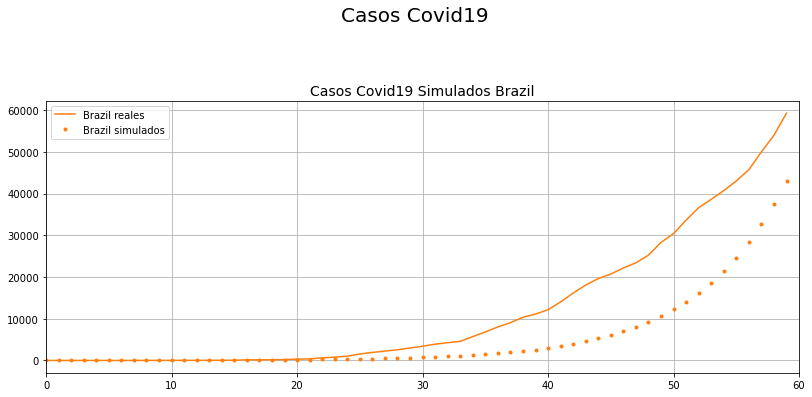

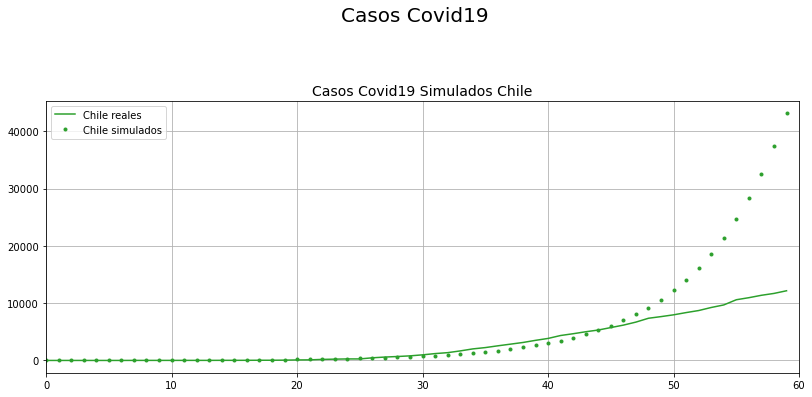

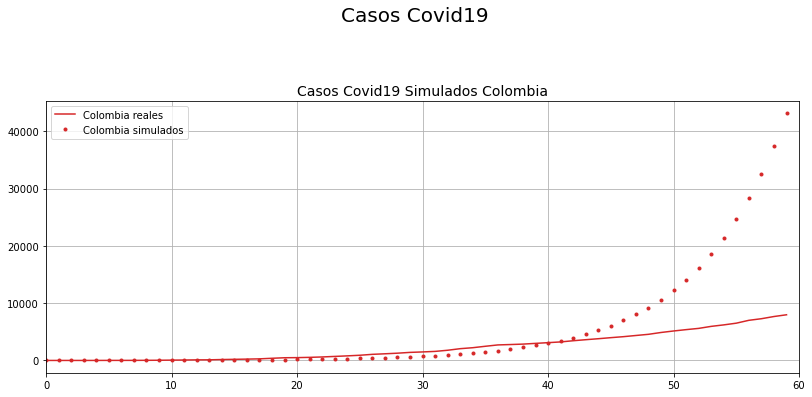

In [139]:
lista_paises = ['Argentina','Brazil','Chile','Colombia']
for lista in lista_paises:
    casos_principio = predecir(lista,k,t0)
    print(lista)

##### 

Aqu√≠ se obserca como se despega la curva de contag√≠os predicha con la real utilizando el modelo entrenado con datos de los paises donde comenz√≥ la epidemia. 

Con los paises elegidos para entrenar nuestro modelo (obtener los par√°metros k y t0) el primer caso de Covid fue detectado el 22 de Febrero.

- Argentina: se detect√≥ el primer caso el 2020-04-26, es decir 62 d√≠as despu√©s de detectado el primer caso en el mundo. La cuarentena comenz√≥ el 20 de marzo tomando medidas muy estrictas.

- Brasil: no se tomaron medidas de resticciones, con lo cual el modelo aproxima a la curva simulada.

- Chile: la cuarentena comenz√≥ el 26 de Marzo, el primer caso fue el 2020-02-24, con lo cual al principio la curva simulada se asemeja al de los casos reales en los paises del emisferio Norte seleccionados, luego se produce una separaci√≥n por las medidas de cuarentena tomadas.

- Colombia: la cuarentena comenz√≥ el 25 de Marzo, el primer caso fue el 2020-02-24

### Comparaci√≥n el modelo con los datos mundiales. Realizamos una predicci√≥n para el resto del mundo

In [140]:
# Definimos la funci√≥n para predecir la curva de contagios para x pais seg√∫n el valor de k obtenido.

#def predecir(lista_paises,k,t0):
def predecir2(x_pais,k,t0):
    '''
    Funci√≥n para calcular el valor de k.
    
    Parameters
    ----------
    lista_paises : lista con los nombres de los 
        paises a evaluar.
         
    Returns
    -------
    valor k: lista
        con valor de k.
    '''
  
    

#    for x_pais in lista_paises:
    #seleccionamos Pais
    print("Pais seleccionado: {}".format(x_pais))
    ind_xpais=np.where(paises==x_pais)
    ind_xpais=ind_xpais[0]
    
    casos_xpais=confirmados[ind_xpais]
    dias=np.arange(0,len(casos_xpais))
    #Imputamos los nan con 0
    #casos_xpais.fillna(0, inplace=True)
    
    
    #Transformamos a lista
    lst = list(casos_xpais)
    # Buscamos el primer valor no nulo, ser√≠a el primer d√≠a con casos
    ##from numpy import nan
    #casos_arg[np.isfinite(casos_arg)][0]
    primer_caso=lst[lst.index(next(filter(lambda x: not np.isnan(x), lst)))]
    # Buscamos el indice del primer elemento no nulo
    ind_x = lst.index(next(filter(lambda x: not np.isnan(x), lst)))
    # primer caso de covid en Pais_X
    dia_start = datos2.date.loc[ind_x]
    print("En {} el/los primer/primeros {} casos fue el d√≠a {} indice {}".format(x_pais,primer_caso, dia_start, ind_x))
    
    ## Graficamos
    #fig, ax = plt.subplots(figsize=(8,3))
    dias=np.arange(0,len(casos_xpais))
    ############### indices inicio y final
    ind_inicio = ind_x
    #ind_inicio = 0
    ind_final = ind_inicio + 60
    #ind_final = ind_inicio 
        
        ################# Estimamos K

    dias_x=np.arange(ind_x,ind_final)
    #dias_x=np.arange(0,60)

    print("----dias_x para simulacion-----")
    print(list(dias_x))
    #print("{} ind_inicio {}  ind_final {}".format(x_pais,ind_inicio,ind_final))
    casos_principio=casos_xpais[ind_inicio:ind_final]
    dias_principio=dias[ind_inicio:ind_final]
    #print("----dias_principio casos reales------")
    #print(list(dias_principio)) 
    #print("------casos_principio reales-----")
    #print(list(casos_principio.astype(int)))

    #ajustamos, popt[0] es nuestro "K" y popt[1] t0
    #popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
    #popt
    
    #Guardamos el valor de k en la lista:
    #lista_k.append(popt[0])

    # Ajustamos los datos con los valores de los par√°metros obtenidos
    #k=popt[0]
    #t0=popt[1]
    #print("PARAMETRO K: ",k)    
    #print("PARAMETRO t0: ",t0)
    #print(dias_principio.size)
    #print(casos_principio.size)
    #print(dias_x.size)
    casos_simu=exponencial_new(dias_x,k,t0)
    #print(casos_simu.size)
    print("-----casos_simu------")
    print(list(casos_simu.astype(np.int)))
   
    ## Graficamos las simulaciones
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"

    #color de la lineas
    color = next(ax._get_lines.prop_cycler)['color']
#    axes.plot(dias_principio,casos_principio,label=label_real, color=color)
    #axes.plot(dias_principio,casos_simu,label=x_pais, color = color)
    #axes.plot(0,dias,'.', color=color)
#    axes.plot(dias_x,casos_simu,'.',label=label_simu, color = color)
    #axes.set_xlabel('das')
    #axes.set_ylabel('cantidad de casos')
#    axes.legend()
#    plt.xlim([ind_inicio,ind_final])
        
    return dias_principio,casos_principio,dias_x,casos_simu,color

Pais seleccionado: Brazil
En Brazil el/los primer/primeros 1.0 casos fue el d√≠a 2020-02-24 indice 0
----dias_x para simulacion-----
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
-----casos_simu------
[11, 12, 14, 16, 19, 22, 25, 29, 33, 39, 44, 51, 59, 68, 78, 90, 104, 119, 137, 158, 182, 209, 241, 277, 319, 367, 422, 486, 559, 644, 741, 852, 980, 1128, 1298, 1493, 1718, 1976, 2274, 2616, 3009, 3462, 3983, 4583, 5272, 6066, 6979, 8029, 9237, 10627, 12226, 14066, 16182, 18617, 21418, 24641, 28349, 32614, 37522, 43168]
Mean Absolute Error: 6430.156770293724
Mean Squared Error: 95150652.76414807
Root Mean Squared Error: 9754.519607041038
Pais seleccionado: Chile
En Chile el/los primer/primeros 2.0 casos fue el d√≠a 2020-02-24 indice 0
----dias_x para simulacion-----
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

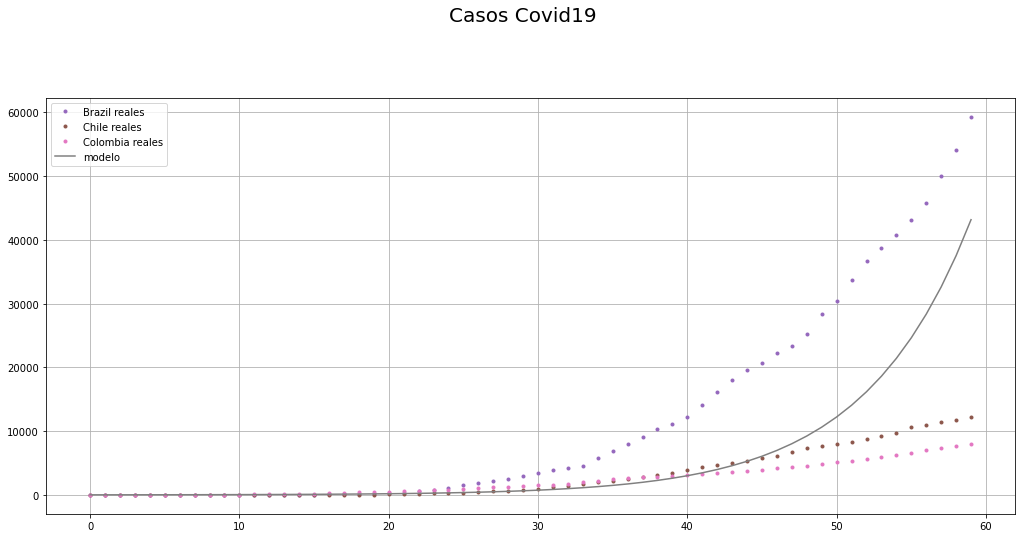

In [141]:
lista_paises = ['Argentina','Brazil','Chile','Colombia']
lista_paises = ['Brazil','Chile','Colombia']
#lista_paises = ['Argentina']

#armamos la figura para el gr√°fico
#fig, ax = plt.subplots(figsize=(15,6))
fig, axes = plt.subplots(1, figsize=(15, 8))
fig.suptitle('Casos Covid19', fontsize=20)
fig.tight_layout(pad=4.0)


#axes.set_title('Casos Covid19 Simulados {}'.format(x_pais),fontsize=14, loc='center')
#axes.set_xlim([0, 120])
axes.grid()

#color lineas gr√°fico
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))

for x_pais in lista_paises:
    dias_principio,casos_principio,dias_x,casos_simu,color = predecir2(x_pais,k,t0)
    label_simu=x_pais + " simulados"
    label_real=x_pais + " reales"
    #print(color)
    axes.plot(dias_principio,casos_principio,'.',label=label_real, color=color)
    #plt.xlim([ind_inicio,ind_final])
    #print(lista)
    #print("----dias_principio casos reales------")
    #print(list(dias_principio)) 
    #print("------casos_principio reales-----")
    #print(list(casos_principio.astype(int)))
    
    #### Calculamos el error
    print('Mean Absolute Error:', metrics.mean_absolute_error(casos_principio, casos_simu))  
    print('Mean Squared Error:', metrics.mean_squared_error(casos_principio, casos_simu))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(casos_principio, casos_simu)))
    
    
axes.plot(dias_x,casos_simu,label="modelo", color = 'grey')
#axes.plot(dias_x,casos_simu,'.',label=label_simu, color = 'red')
axes.legend()


In [58]:
#flatten() function return a copy of the array collapsed into one dimension
df = pd.DataFrame({'Actual': np.array(casos_principio).flatten(), 'Predicted': casos_simu.flatten()})
df.head()

Actual  Predicted
0     1.0  11.056011
1     1.0  12.719571
2     1.0  14.633441
3     1.0  16.835285
4     3.0  19.368432

array([0.04753203, 0.10163528, 0.0635901 , 0.04761911, 0.17493261,
       0.17004881, 0.20641065, 0.14281278, 0.15235234, 0.13752235,
       0.15523558, 0.10482722])

In [92]:
df = datos_orig

In [107]:
fechas = []
contagios_mundiales = []

for i in tqdm(df.date.unique()):
  contagios = df.loc[df['date'] == i,['total_cases']].sum()
  contagios_mundiales.append(int(contagios))
  fechas.append(i)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 644/644 [00:06<00:00, 94.92it/s]


In [109]:
#contagios_mundiales = pd.DataFrame(contagios_mundiales, columns=['total_cases'])
#contagios_mundiales.iloc[3]

In [110]:
d = {'date': fechas, 'total_cases': contagios_mundiales}
df_casos_mundo = pd.DataFrame(d)
df_casos_mundo.date = pd.to_datetime(df_casos_mundo.date)
df_casos_mundo.set_index(df_casos_mundo.date, inplace = True)
df_casos_mundo.drop(columns = ["date"], inplace = True)
plt.figure(figsize=(20,7))
df_casos_mundo.sort_index(inplace = True)

<Figure size 1440x504 with 0 Axes>

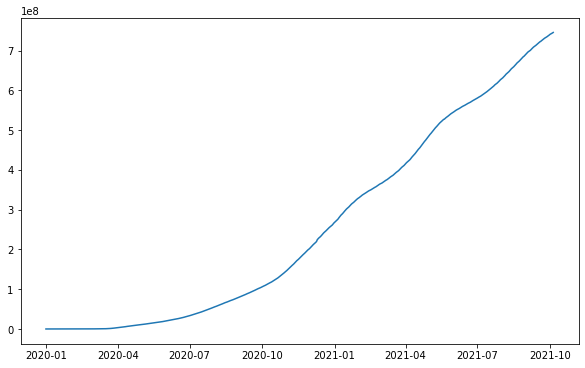

In [113]:
plt.figure(figsize=(10,6))

#plt.subplot(1,1,1)
#df_casos_mundo.drop(columns = ["date"], inplace = True)
#plt.figure(figsize=(20,7))
#df_casos_mundo.sort_index(inplace = True)
plt.plot(df_casos_mundo['total_cases'])
#plt.plot(contagios_mundiales['total_cases'])

In [123]:
df_casos_mundo['total_cases'][15:25]

date
2020-01-16       0
2020-01-17       0
2020-01-18       0
2020-01-19       0
2020-01-20       0
2020-01-21       0
2020-01-22    1671
2020-01-23    1965
2020-01-24    2825
2020-01-25    4305
Name: total_cases, dtype: int64

In [144]:
## df_casos_mundo.reset_index(drop = True, inplace=True)
df_casos_mundo[15:26]

total_cases
15            0
16            0
17            0
18            0
19            0
20            0
21         1671
22         1965
23         2825
24         4305
25         6357

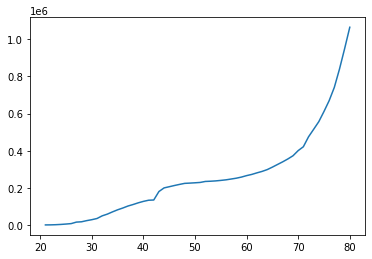

In [156]:
plt.plot(df_casos_mundo['total_cases'][21:81])

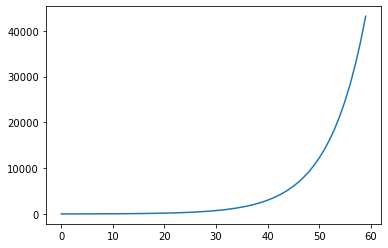

In [158]:
plt.plot(casos_simu)